In [1]:
import hvplot.pandas
import pandas as pd
import requests
from pprint import pprint
from pathlib import Path
import matplotlib.pyplot as plt

from keys import Trip_advisor_key
from keys import geoapify_key

In [13]:

# Defining the District dataframe

Districts_df = pd.DataFrame({
    'Location': ['Toronto Distillery District', 'Toronto GTA Area', 'Toronto Downtown', 'Toronto King West', 'Toronto Queen West' , 'Toronto College West', 'Toronto Yorkville','Toronto Old Town', 'Toronto Airport', 'Ottawa City Centre' , 'Niagara Falls'],
    'Lat': [43.6503, 43.6426 , 43.655064 , 43.642567, 43.647044, 43.6552,  43.6707 , 43.3906, 43.6817, 45.4236, 43.087586], 
    'Lng': [-79.3596, -79.3871, -79.386563 , -79.387054, -79.403698, -79.4139,  -79.3930 , -79.2253 ,  -79.6145, -75.7009, -79.081206]  
})

Districts_df.to_csv("output_data/Districts.csv", index_label="Restaurant ID")

# Defining the Restaurant DataFrame

Restaurants_df = pd.DataFrame(columns=['Location', 'Restaurant Name', 'Postal Code', 'Restaurant Address', 'Lat', 'Lng'])

# Loop for districts
radius = 1000

params = {
    'categories': 'catering.restaurant',
    'apiKey': geoapify_key,
    'limit':50
}

base_url = 'https://api.geoapify.com/v2/places'

for index, row in Districts_df.iterrows():
    latitude = row['Lat']
    longitude = row['Lng']

    params['filter'] = f'circle:{longitude},{latitude},{radius}'
    params['bias'] = f'proximity:{longitude},{latitude}'

    response = requests.get(base_url, params=params).json()
    for restaurant in response.get('features', []):
        try:
            
            new_row = {
                            'Location': row['Location'],
                            'Restaurant Name': restaurant["properties"]["address_line1"],
                            'Postal Code' : restaurant["properties"]["postcode"],
                            'Restaurant Address': restaurant["properties"]["address_line2"],
                            'Lat': restaurant["geometry"]["coordinates"][1],
                            'Lng': restaurant["geometry"]["coordinates"][0]
                        }
            
            Restaurants_df.loc[len(Restaurants_df)] = new_row
        except(KeyError, IndexError):
            print('Error.')


Error.
Error.
Error.
Error.
Error.
Error.


KeyboardInterrupt: 

In [123]:
Restaurants_df.head()

,Location,Restaurant Name,Postal Code,Restaurant Address,Lat,Lng
0,Toronto Distillery District,Archeo Trattoria,M5A 3C4,"31 Trinity Street, Old Toronto, ON M5A 3C4, Ca...",43.650682,-79.359630
1,Toronto Distillery District,El Catrin,M5A 3C4,"Mill Street, Old Toronto, ON M5A 3C4, Canada",43.650693,-79.359245
2,Toronto Distillery District,Oyster House & grill,M5A 3C4,"Tank House Lane, Old Toronto, ON M5A 3C4, Canada",43.650350,-79.358811
3,Toronto Distillery District,Pure Spirits,M5A 3C4,"17 Tank House Lane, Old Toronto, ON M5A 3C4, C...",43.650395,-79.358754
4,Toronto Distillery District,The Fermenting Cellar,M5A 3C4,"28 Distillery Lane, Old Toronto, ON M5A 3C4, C...",43.649806,-79.360538


In [124]:
# Export the Restaurant_df into a csv
Restaurants_df.to_csv("output_data/restaurants.csv", index_label="Restaurant ID")

In [4]:
#Import restaurants.csv
Restaurants_df = pd.read_csv('output_data/restaurants.csv')

In [5]:
#Drill for location_id

Restaurants_df['Location ID'] = ''

err_count = 0


for index, restaurant in Restaurants_df.iterrows():
    
    url = f"https://api.content.tripadvisor.com/api/v1/location/search?key={Trip_advisor_key}&searchQuery={restaurant['Restaurant Name']}&language=en"

    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers).json()
    
    try:
        
        for res in response['data']:
    
            if res['address_obj']['postalcode'] == restaurant['Postal Code']:
            
                Restaurants_df.at[index, 'Location ID'] = res['location_id']
                
                break
    
    except Exception as e:
        
        err_count = err_count +1
        
        
#print(response.text)
print(err_count)
Restaurants_df.head()

182


,Restaurant ID,Location,Restaurant Name,Postal Code,Restaurant Address,Lat,Lng,Location ID
0,0,Toronto Distillery District,Archeo Trattoria,M5A 3C4,"31 Trinity Street, Old Toronto, ON M5A 3C4, Ca...",43.650682,-79.359630,5078107
1,1,Toronto Distillery District,El Catrin,M5A 3C4,"Mill Street, Old Toronto, ON M5A 3C4, Canada",43.650693,-79.359245,4556927
2,2,Toronto Distillery District,Oyster House & grill,M5A 3C4,"Tank House Lane, Old Toronto, ON M5A 3C4, Canada",43.650350,-79.358811,
3,3,Toronto Distillery District,Pure Spirits,M5A 3C4,"17 Tank House Lane, Old Toronto, ON M5A 3C4, C...",43.650395,-79.358754,708144
4,4,Toronto Distillery District,The Fermenting Cellar,M5A 3C4,"28 Distillery Lane, Old Toronto, ON M5A 3C4, C...",43.649806,-79.360538,


In [7]:
#Drop row with empty records
Restaurants_df = Restaurants_df[Restaurants_df['Location ID'] != '']
Restaurants_df.head()

,Restaurant ID,Location,Restaurant Name,Postal Code,Restaurant Address,Lat,Lng,Location ID
0,0,Toronto Distillery District,Archeo Trattoria,M5A 3C4,"31 Trinity Street, Old Toronto, ON M5A 3C4, Ca...",43.650682,-79.359630,5078107
1,1,Toronto Distillery District,El Catrin,M5A 3C4,"Mill Street, Old Toronto, ON M5A 3C4, Canada",43.650693,-79.359245,4556927
3,3,Toronto Distillery District,Pure Spirits,M5A 3C4,"17 Tank House Lane, Old Toronto, ON M5A 3C4, C...",43.650395,-79.358754,708144
5,5,Toronto Distillery District,Cluny,M5A 3C4,"Tank House Lane, Old Toronto, ON M5A 3C4, Canada",43.650604,-79.357865,6762792
20,20,Toronto Distillery District,Fusilli Ristorante,M5A 1V1,"531 Queen Street East, Old Toronto, ON M5A 1V1...",43.657075,-79.357150,704440


In [8]:
# Export the Restaurant_df with restaurants Location ID into a csv 
Restaurants_df.to_csv("output_data/TA_restaurants.csv", index = False)

In [9]:
#Import restaurants.csv
Restaurants_df = pd.read_csv('output_data/TA_restaurants.csv')

In [10]:
#Drill for reviews 

#New df Reviews
Reviews_df = pd.DataFrame(columns=['Location','Restaurant Name','Lat','Lng','Review'])

#Looooppping!!! Again. Yes.
for index, restaurant in Restaurants_df.iterrows():
    
    url = f"https://api.content.tripadvisor.com/api/v1/location/{restaurant['Location ID']}/reviews?key={Trip_advisor_key}&language=en"
    
    headers = {"accept": "application/json"}
    
    response = requests.get(url, headers=headers).json()
    
    #Let's try this!!!
    try:
        
        for res in response['data']: 
            
            new_row = {'Location' : restaurant['Location'],
                       'Restaurant Name' : restaurant['Restaurant Name'],
                       'Lat': restaurant['Lat'],
                       'Lng': restaurant['Lng'],
                       'Review' : res['rating']}
            Reviews_df.loc[len(Reviews_df)] = new_row
    
    except(KeyError, IndexError):
            print('Error.')
            

In [11]:
Reviews_df.head()

,Location,Restaurant Name,Lat,Lng,Review
0,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,2
1,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,3
2,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,1
3,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,5
4,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,5


In [12]:
Reviews_df.to_csv("output_data/Reviews.csv", index = False)

In [6]:

Reviews_df = pd.read_csv('output_data/Reviews.csv')

Districts_df = pd.read_csv('output_data/Districts.csv')

#Reviews_df

#Districts_df

Plotting_df = Reviews_df.merge(Districts_df, on='Location', how='left')

Plotting_df.columns = Plotting_df.columns.str.replace('_x', ' Restaurant').str.replace('_y', ' Location')

Plotting_df = Plotting_df.drop('Restaurant ID', axis=1)

average_reviews = Plotting_df.groupby('Restaurant Name')['Review'].mean().reset_index()

Plotting_df = Plotting_df.merge(average_reviews, on='Restaurant Name', suffixes=('', '_average'))


Plotting_df.head(30)

,Location,Restaurant Name,Lat Restaurant,Lng Restaurant,Review,Lat Location,Lng Location,Review_average
0,Toronto Distillery District,Archeo Trattoria,43.650682,-79.359630,2,43.6503,-79.3596,3.2
1,Toronto Distillery District,Archeo Trattoria,43.650682,-79.359630,3,43.6503,-79.3596,3.2
2,Toronto Distillery District,Archeo Trattoria,43.650682,-79.359630,1,43.6503,-79.3596,3.2
3,Toronto Distillery District,Archeo Trattoria,43.650682,-79.359630,5,43.6503,-79.3596,3.2
4,Toronto Distillery District,Archeo Trattoria,43.650682,-79.359630,5,43.6503,-79.3596,3.2
5,Toronto Distillery District,El Catrin,43.650693,-79.359245,5,43.6503,-79.3596,3.8
6,Toronto Distillery District,El Catrin,43.650693,-79.359245,2,43.6503,-79.3596,3.8
7,Toronto Distillery District,El Catrin,43.650693,-79.359245,3,43.6503,-79.3596,3.8
8,Toronto Distillery District,El Catrin,43.650693,-79.359245,5,43.6503,-79.3596,3.8
9,Toronto Distillery District,El Catrin,43.650693,-79.359245,4,43.6503,-79.3596,3.8


In [8]:
Districts_map = Plotting_df.hvplot.points(
    'Lng Location',
    'Lat Location',
    geo = True,
    tiles = 'OSM',
    color = 'Location',
    frame_width = 800,
    frame_height = 600,
    hover_cols=['Location','Restaurant Name'],
    size = 200
)


Districts_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng Location,Lat Location]   (Location,Restaurant Name)

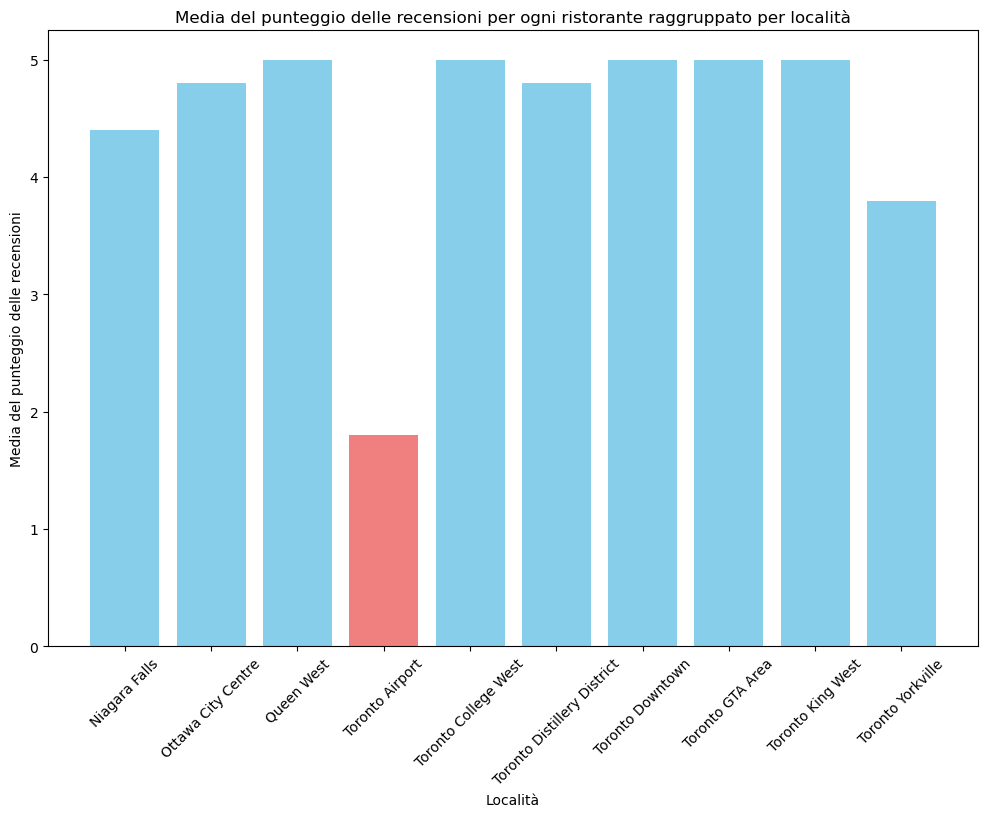

In [3]:
# Calcola la media del punteggio delle recensioni per ogni ristorante raggruppato per località
avg_reviews = Plotting_df.groupby(['Location', 'Restaurant Name'])['Review'].mean().reset_index()

# Assegna un colore condizionale in base alla media del punteggio delle recensioni
colors = ['skyblue' if x >= 3 else 'lightcoral' for x in avg_reviews['Review']]

# Crea il grafico a barre con colori condizionali
plt.figure(figsize=(12, 8))
plt.bar(avg_reviews['Location'], avg_reviews['Review'], color=colors)
plt.title('Media del punteggio delle recensioni per ogni ristorante raggruppato per località')
plt.xlabel('Località')
plt.ylabel('Media del punteggio delle recensioni')
plt.xticks(rotation=45)
plt.show()

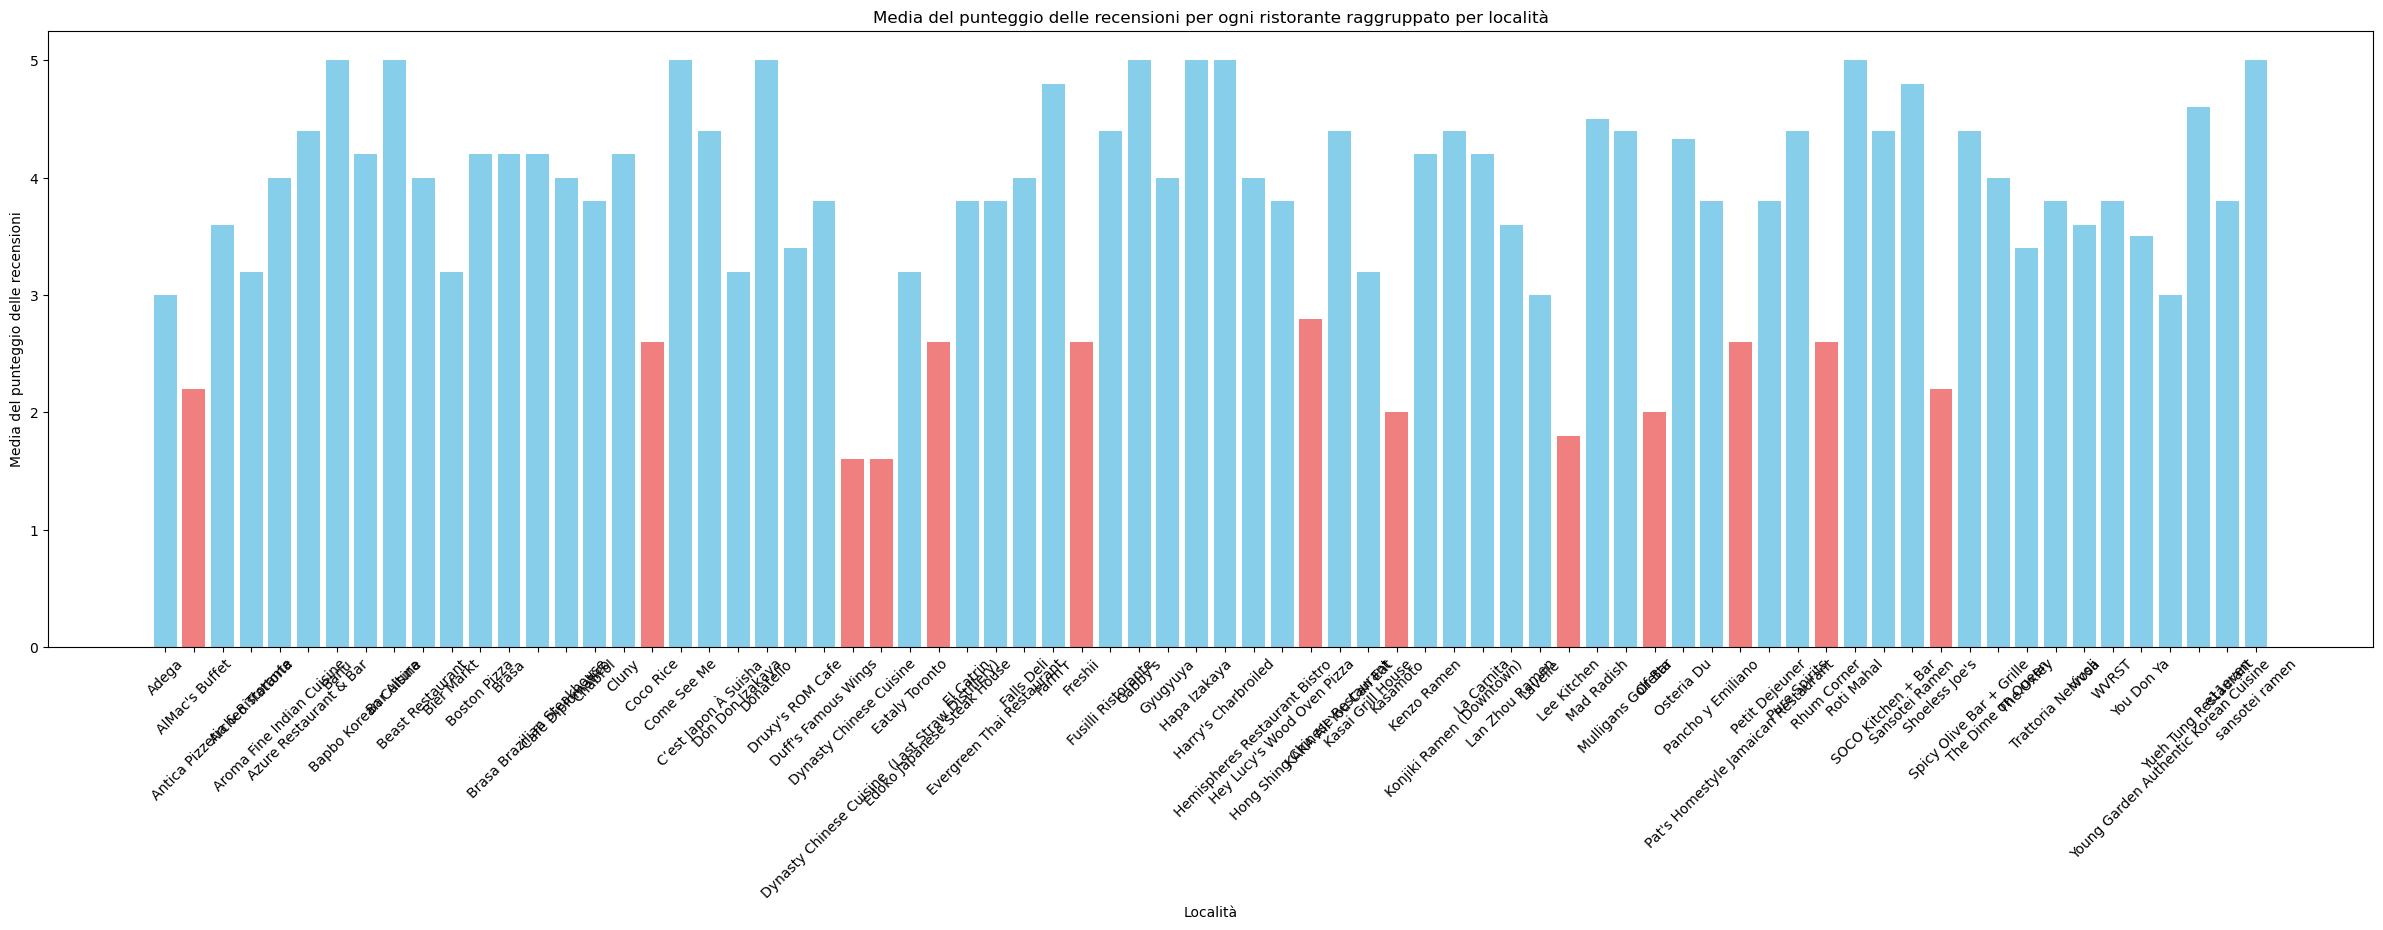

In [19]:
avg_reviews = Plotting_df.groupby(['Restaurant Name'])['Review'].mean().reset_index()

colors = ['skyblue' if x >= 3 else 'lightcoral' for x in avg_reviews['Review']]

# Crea il grafico a barre con colori condizionali
plt.figure(figsize=(30, 8))
plt.bar(avg_reviews['Restaurant Name'], avg_reviews['Review'], color=colors)
plt.title('Media del punteggio delle recensioni per ogni ristorante raggruppato per località')
plt.xlabel('Località')
plt.ylabel('Media del punteggio delle recensioni')
plt.xticks(rotation=45)
plt.show()

C:\Users\Alessandro Mori\AppData\Local\Temp\ipykernel_18468\2471152035.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Toronto_res_df = unique_restaurants_df[Plotting_df['Location'].isin(Toronto)]


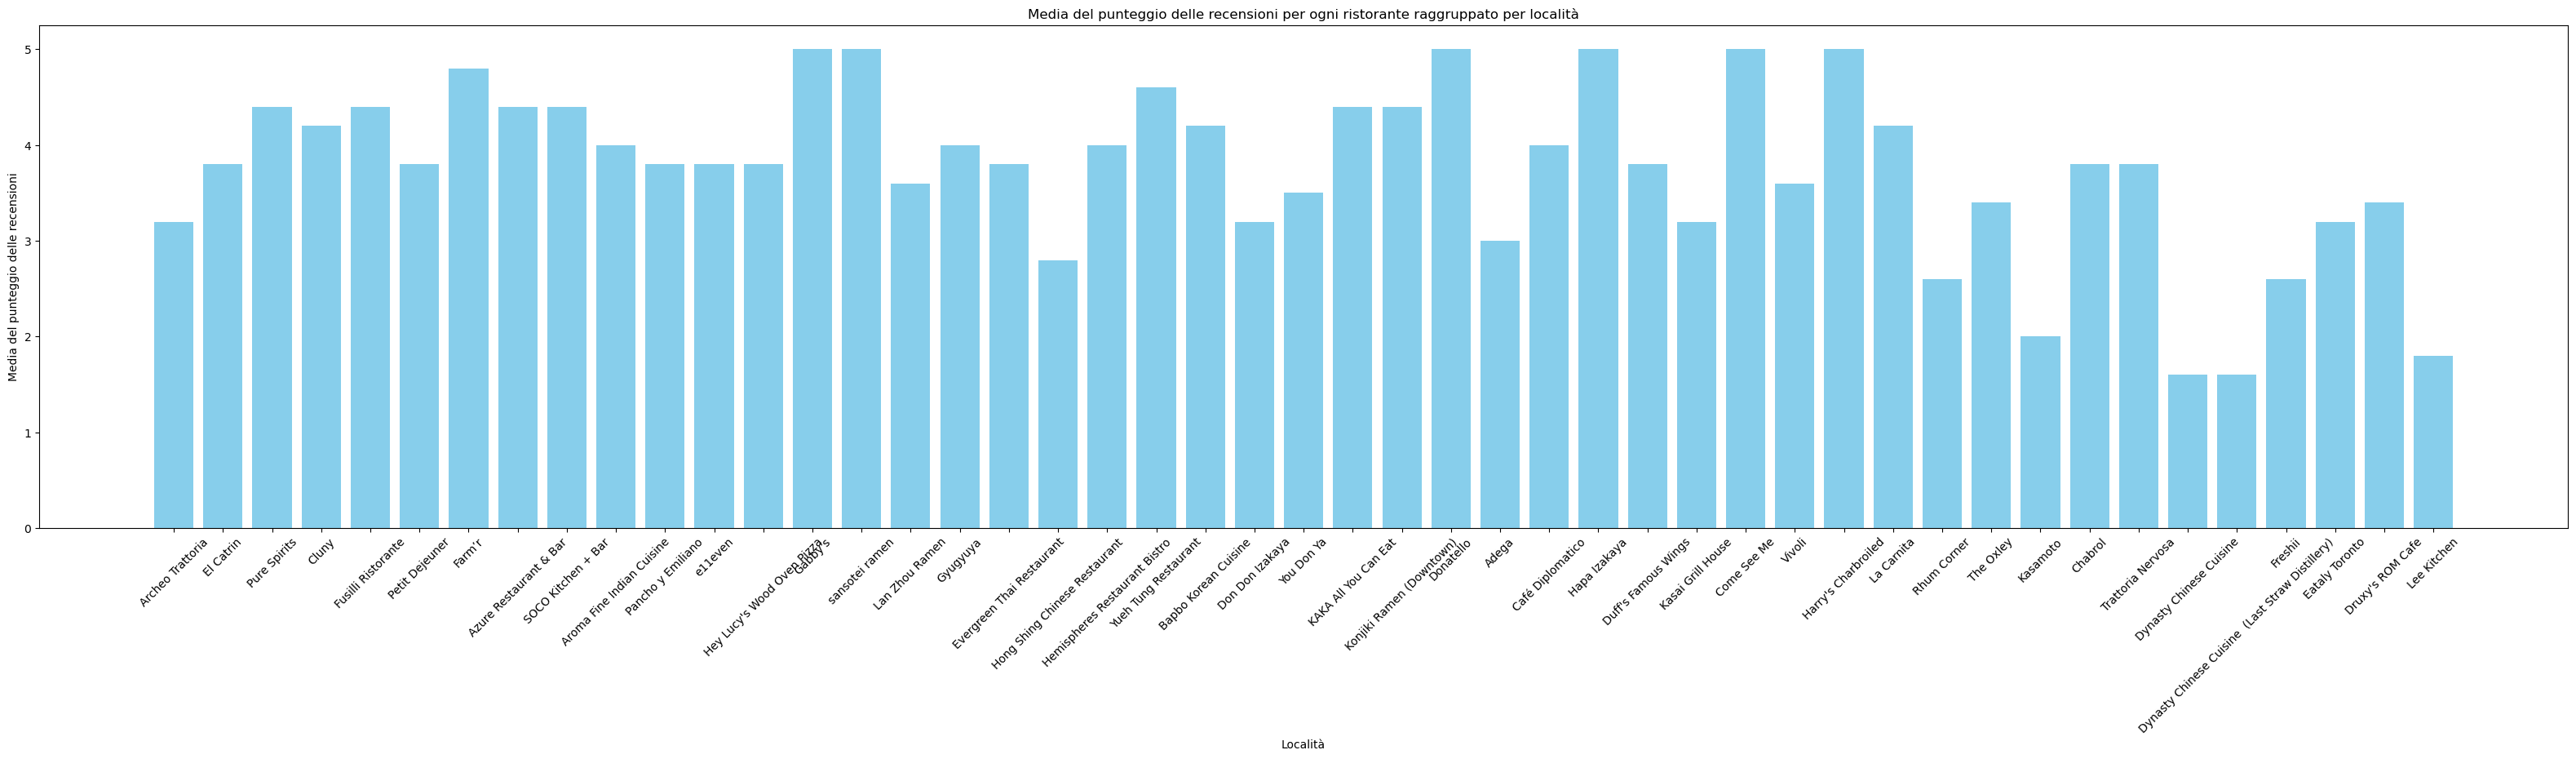

In [27]:
#totonto single restaurant plot

Toronto = ['Toronto Distillery District','Toronto Distillery District', 'Toronto GTA Area', 'Toronto Downtown', 'Toronto King West', 'Toronto Queen West' , 'Toronto College West', 'Toronto Yorkville','Toronto Old Town', 'Toronto Airport']


#Toronto_res_df = Plotting_df[Plotting_df['Location'].isin(Toronto)]


unique_restaurants_df = Plotting_df.drop_duplicates(subset='Restaurant Name')


Toronto = ['Toronto Distillery District','Toronto Distillery District', 'Toronto GTA Area', 'Toronto Downtown', 'Toronto King West', 'Toronto Queen West' , 'Toronto College West', 'Toronto Yorkville','Toronto Old Town', 'Toronto Airport']

Toronto_res_df = unique_restaurants_df[Plotting_df['Location'].isin(Toronto)]


# Stampa del nuovo dataframe con un solo record per ogni nome di ristorante
#unique_restaurants_df

plt.figure(figsize=(40, 8))
plt.bar(Toronto_res_df['Restaurant Name'], Toronto_res_df['Review_average'], color='skyblue')
plt.title('Media del punteggio delle recensioni per ogni ristorante raggruppato per località')
plt.xlabel('Località')
plt.ylabel('Media del punteggio delle recensioni')
plt.xticks(rotation=45)
plt.show()
#Toronto_res_df

In [115]:
#REFERENCE TA REVIEWS API

Restaurants_df = pd.read_csv('output_data/restaurants.csv')

url = f"https://api.content.tripadvisor.com/api/v1/location/4556927/reviews?key={Trip_advisor_key}&language=en"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers).json()

#response['data']    ['rating']   

pprint(response)

{'data': [{'helpful_votes': 0,
           'id': 925898830,
           'lang': 'en',
           'location_id': 4556927,
           'published_date': '2023-11-14T16:59:39Z',
           'rating': 5,
           'rating_image_url': 'https://www.tripadvisor.com/img/cdsi/img2/ratings/traveler/s5.0-66827-5.svg',
           'subratings': {},
           'text': 'A very nice restaurant in the Distillery district of '
                   'Toronto. A lot to chose from on the menu, spicy and tasty. '
                   'That goes for the drinks as well, their Margaritas are '
                   'really good. Service was good, very spontaneous and fun. '
                   'Not too expensive as well.',
           'title': 'Good and tasty',
           'travel_date': '2023-05-31',
           'trip_type': 'Family',
           'url': 'https://www.tripadvisor.com/ShowUserReviews-g155019-d4556927-r925898830-Reviews-El_Catrin-Toronto_Ontario.html?m=66827#review925898830',
           'user': {'avatar': {'larg

In [ ]:
#REFERENCE TA lOCATION API

url = f"https://api.content.tripadvisor.com/api/v1/location/search?key={Trip_advisor_key}&searchQuery=Mom and Pops&language=en"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
    
print(response.text)

In [ ]:
#REFERENCE GEOGRAPY API

radius = 1000

params = {
    'categories': 'catering.restaurant',
    'apiKey': geoapify_key,
}

base_url = 'https://api.geoapify.com/v2/places'

latitude = 43.6503
longitude = -79.3596

params['filter'] = f'circle:{longitude},{latitude},{radius}'
params['bias'] = f'proximity:{longitude},{latitude}'

response = requests.get(base_url, params=params).json()

pprint(response)